In this notebook we will carry the trend analysis of technology stocks. 

## Basic plotting

### Candle plot


In [74]:
import yfinance as yfin
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import pandas_datareader.data as pdr

yfin.pdr_override()

# List of stock symbols
tech_stocks = 'AAPL'

# Set the date range for the historical data
start_date = '2023-05-01'
end_date = '2023-08-01'

# Download historical stock data for each stock

stocks = pdr.get_data_yahoo(tech_stocks, start_date, end_date)



[*********************100%%**********************]  1 of 1 completed


In [53]:
kwargs =  dict(type='candle', title =f' Candlestick chart {start_date} to {end_date}',ylabel='Candlestick',figratio=(30,15),figscale=0.75, volume=True)

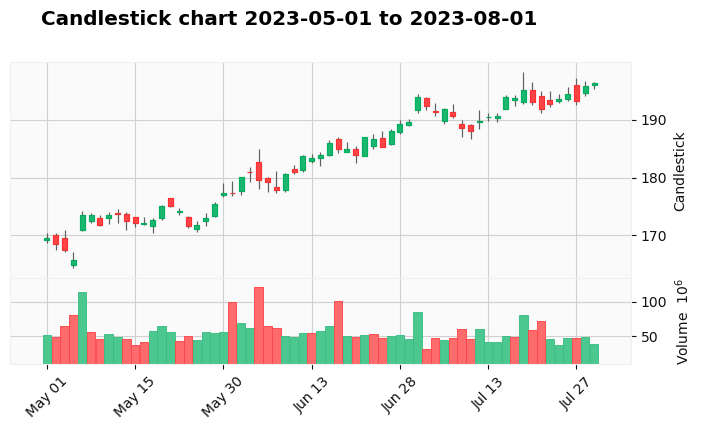

In [55]:
import mplfinance as mpf 

mpf.plot(stocks,**kwargs,style='yahoo')

### OHLC Chart

In [61]:
kwargs =  dict(type='ohlc', title =f' OHLC chart {start_date} to {end_date}',ylabel='OHLC',figratio=(30,15),figscale=0.75, volume=True)

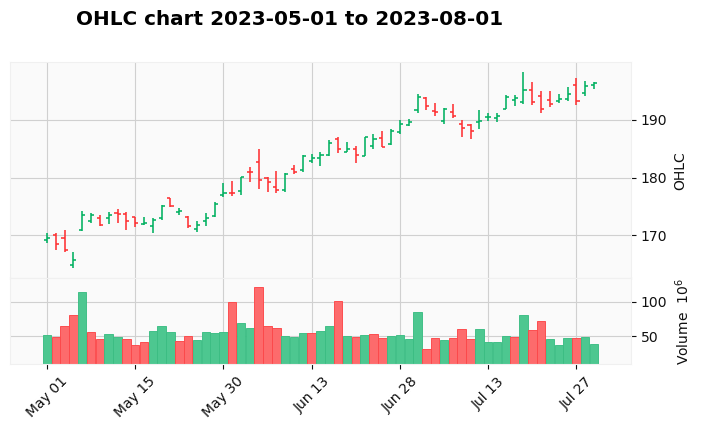

In [62]:
mpf.plot(stocks,**kwargs,style='yahoo')

## Moving average

### Simple moving average

Average over data points in a rolling window. To calculate an SMA the first step is to determine how many periods will be used as the average. The most common peri-
ods are 20, 50, 100 and 200 days. 
For strong movement in the security market, it may be useful to use the 50-day period. If there has not been any change in the companies during of comparison it may be useful to use the 100 or 200-day period.

In [81]:
# Set the date range for the historical data
start_date = '2020-08-01'
end_date = '2023-08-01'

# Download historical stock data for each stock

stocks = pdr.get_data_yahoo(tech_stocks, start_date, end_date)

stocks.dropna(inplace=True)

# Moving average
stocks['50ma'] = stocks['Close'].rolling(50).mean()

stocks['100ma'] = stocks['Close'].rolling(100).mean()

stocks['200ma'] = stocks['Close'].rolling(200).mean()


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='SMA'>

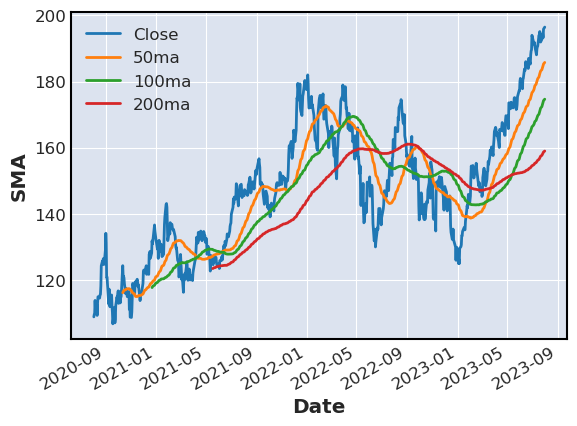

In [90]:
stocks[['Close','50ma','100ma','200ma']].plot(label=['Close','50ma','100ma','200ma'],ylabel='SMA')

### Exponential moving average

In [92]:
stocks['EMA50'] = stocks['Close'].ewm(span=50, adjust=False).mean()

stocks['EMA100'] = stocks['Close'].ewm(span=100, adjust=False).mean()

stocks['EMA200'] = stocks['Close'].ewm(span=200, adjust=False).mean()


<Axes: xlabel='Date', ylabel='EMA'>

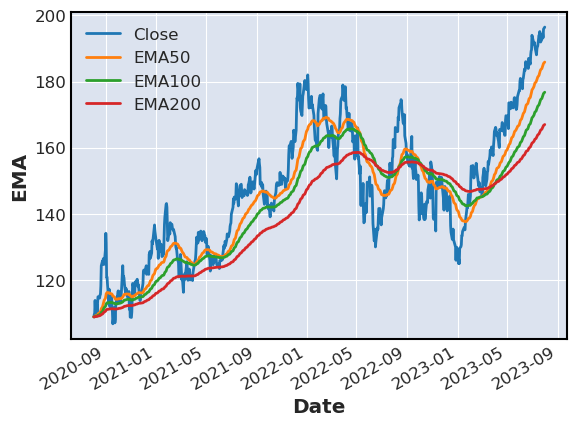

In [93]:
stocks[['Close','EMA50','EMA100','EMA200']].plot(label=['Close','EMA50','EMA100','EMA200'],ylabel='EMA')

## Trend reversal

### MACD

- The MACD line which measures the distance between two moving 
averages.
- Signal line that identifies price change
- Histogram that represents the difference between MACD and signal line.

$MACD = EMA \ for \ 12 \ periods \ − \ EMA \ for \ 26 \ periods$


In [94]:
# MACD for the stock 

stocks['MACD'] = stocks['Close'].ewm(span=12, adjust=False).mean() - stocks['Close'].ewm(span=26, adjust=False).mean()

# baseline for the MACD

stocks['baseline'] = 0


<Axes: xlabel='Date', ylabel='MACD'>

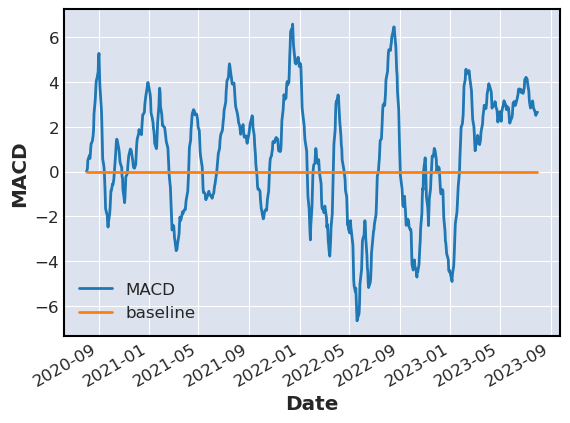

In [95]:
stocks[['MACD','baseline']].plot(label=['MACD','baseline'],ylabel='MACD')

When the MACD is above the baseline then the stock or market is bullish, if the market is below the zero line then the market is bearish.

- When the MACD crosses the signal line from below to above the 
indicator is considered bullish.
- When the MACD crossed the signal line from above to below the indicator is considered bearish.

MACD signal line is equivalent to 9 perdio EMA of MACD

<Axes: xlabel='Date', ylabel='MACD'>

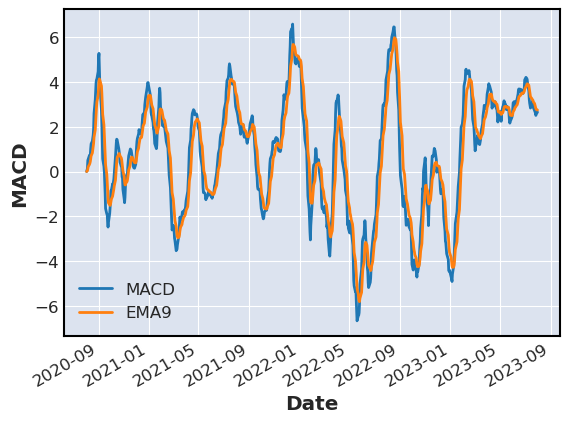

In [102]:
stocks['EMA9'] = stocks['MACD'].ewm(span=9, adjust=False).mean()

stocks[['MACD','EMA9']].plot(label=['MACD','EMA9'],ylabel='MACD')


### Bollinger Bands

 Bollinger bands use moving average and volatility of stocks to give an indication for when the stock is oversold or overbought.

- When price is stable bands are close together. 
- If a price moves beyond the upper barrier the prices are considered 
overbought. 
- If  a  price  moves  below  the  upper  barrier  then  the  prices  are  con-
sidered oversold. 

Rolling standard deviation and average for calculating bands are typically calculated for a period of 20 days.

<Axes: xlabel='Date', ylabel='Bollinger Band'>

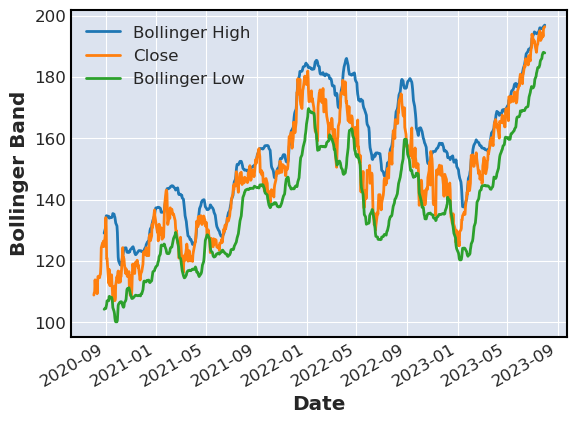

In [105]:
window_of_days = 20
number_std = 2

# calculate the rolling mean and standard deviation
rolling_mean = stocks['Close'].rolling(window_of_days).mean() 
rolling_std = stocks['Close'].rolling(window_of_days).std() 

# calculate the upper and lower bands
stocks['Bollinger High'] = rolling_mean + (rolling_std * number_std) 
stocks['Bollinger Low'] = rolling_mean - (rolling_std * number_std) 

stocks[['Bollinger High','Close','Bollinger Low']].plot(ylabel='Bollinger Band')

## Backtesting